In [1]:
import pandas as pd

no3 = pd.read_csv("C:/Users/Usuario/DB/Hack_csv/no3_full.csv")
po4 = pd.read_csv("C:/Users/Usuario/DB/Hack_csv/po4_full.csv")
si  = pd.read_csv("C:/Users/Usuario/DB/Hack_csv/si_full.csv")

# Estandarizar nombres
for df in [no3, po4, si]:
    df.rename(columns={
        'latitude': 'lat',
        'longitude': 'lon'
    }, inplace=True)

# Mantener solo superficie
cols = ['time','depth','lat','lon']
no3 = no3[cols + ['no3']]
po4 = po4[cols + ['po4']]
si  = si [cols + ['si']]

# Merge secuencial
merged = no3.merge(po4, on=cols, how='inner')
merged = merged.merge(si,  on=cols, how='inner')

print("Base final nutrientes:", merged.shape)
nut = merged.copy()
nut.head()

Base final nutrientes: (4522, 7)


,time,depth,lat,lon,no3,po4,si
0,2024-02-01,0.494025,28.0,-115.25,0.279488,0.560324,3.070475
1,2024-02-01,0.494025,28.0,-115.00,0.274639,0.555834,2.971884
2,2024-02-01,0.494025,28.0,-114.75,0.113935,0.542683,2.754522
3,2024-02-01,0.494025,28.0,-114.50,0.095979,0.557995,2.735527
4,2024-02-01,0.494025,28.0,-114.25,0.033540,0.558439,2.672907


In [2]:
chl = pd.read_csv("C:/Users/Usuario/DB/Hack_csv/chlorophyll_gc_monthly_pixels (1) (1).csv")

chl = chl.rename(columns={'time':'date'})
chl['date'] = pd.to_datetime(chl['date'])

chl.dropna(subset=['chlor_a'], inplace=True)

clor = chl.copy()
clor.head()

,date,lat,lon,chlor_a
595,2024-06-01,31.729164,-114.770830,3.638275
596,2024-06-01,31.729164,-114.729164,4.231940
597,2024-06-01,31.729164,-114.687500,4.120379
598,2024-06-01,31.729164,-114.645830,3.585763
599,2024-06-01,31.729164,-114.604164,3.597894


In [3]:
import pandas as pd

thetao = pd.read_csv("C:/Users/Usuario/DB/Hack_csv/thetao_full.csv")

thetao = thetao.rename(columns={
    'latitude': 'lat',
    'longitude': 'lon'
})

thetao['time'] = pd.to_datetime(thetao['time'])

thetao = thetao[['time','depth','lat','lon','thetao']]

temp = thetao.copy()
temp.head()

,time,depth,lat,lon,thetao
0,2024-02-01,0.494025,27.916666,-115.333330,17.453094
1,2024-02-01,0.494025,27.916666,-115.250000,17.402447
2,2024-02-01,0.494025,27.916666,-115.166664,17.425081
3,2024-02-01,0.494025,27.916666,-115.083330,17.458990
4,2024-02-01,0.494025,27.916666,-115.000000,17.495415


In [4]:
type(nut)

pandas.core.frame.DataFrame

In [5]:
import os

base_path = r"C:/Users/Usuario/DB/datos_sat"
os.makedirs(base_path, exist_ok=True)

nut.to_csv(f"{base_path}/nutrientes_base.csv", index=False)
temp.to_csv(f"{base_path}/temperatura_base.csv", index=False)
clor.to_csv(f"{base_path}/clorofila_base.csv", index=False)

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
def normality_check(df, var, name=""):
    data = df[var].dropna()

    print(f"\n==============================")
    print(f"Dataset: {name}")
    print(f"Variable: {var}")
    print(f"N = {len(data)}")

    # Histograma
    plt.figure()
    plt.hist(data, bins=40)
    plt.title(f"{name} – Histogram ({var})")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

    # Q-Q plot
    plt.figure()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"{name} – Q-Q plot ({var})")
    plt.show()

    # Tests
    if len(data) > 5000:
        data_test = data.sample(5000, random_state=42)
        stat, p = stats.shapiro(data_test)
        print(f"Shapiro-Wilk (subsample): W={stat:.3f}, p={p:.3e}")
    else:
        stat, p = stats.shapiro(data)
        print(f"Shapiro-Wilk: W={stat:.3f}, p={p:.3e}")

    stat, p = stats.normaltest(data)
    print(f"D’Agostino-Pearson: K2={stat:.3f}, p={p:.3e}")

    if p < 0.05:
        print("❌ No normal")
    else:
        print("✅ Compatible con normalidad")


Dataset: Nutrients
Variable: no3
N = 1526


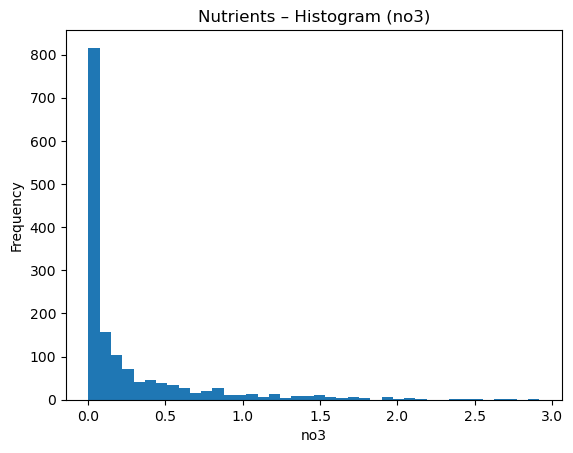

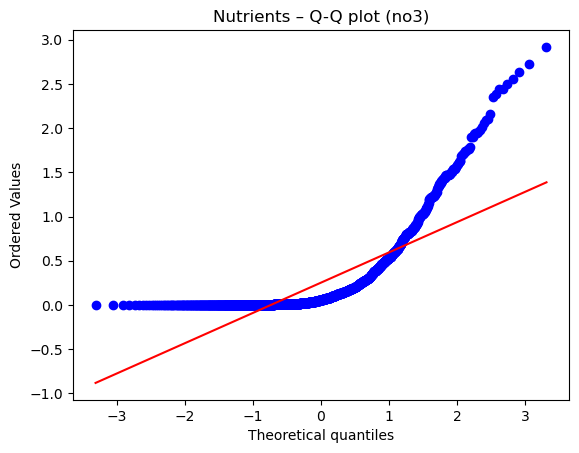

Shapiro-Wilk: W=0.637, p=6.483e-49
D’Agostino-Pearson: K2=838.042, p=1.051e-182
❌ No normal

Dataset: Nutrients
Variable: po4
N = 1526


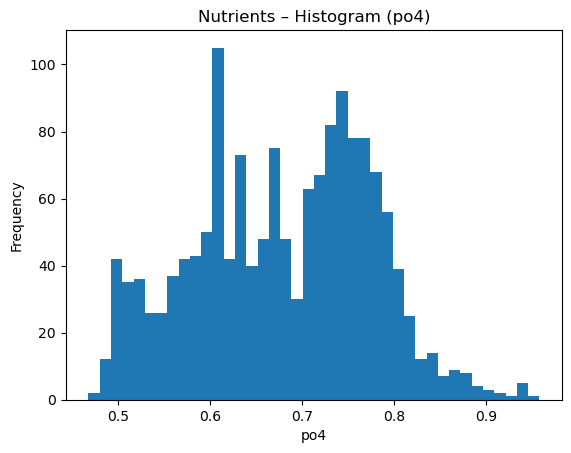

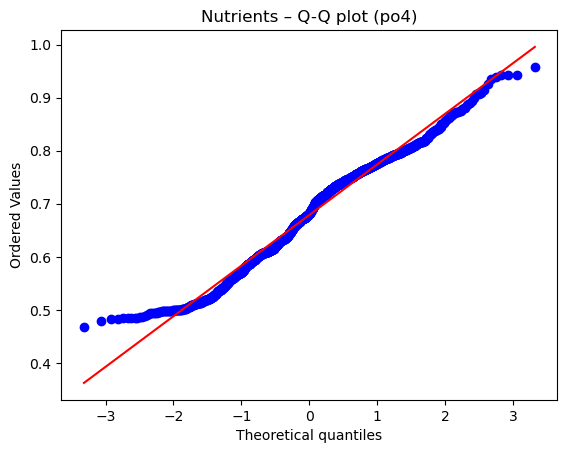

Shapiro-Wilk: W=0.981, p=1.901e-13
D’Agostino-Pearson: K2=80.150, p=3.942e-18
❌ No normal

Dataset: Nutrients
Variable: si
N = 1526


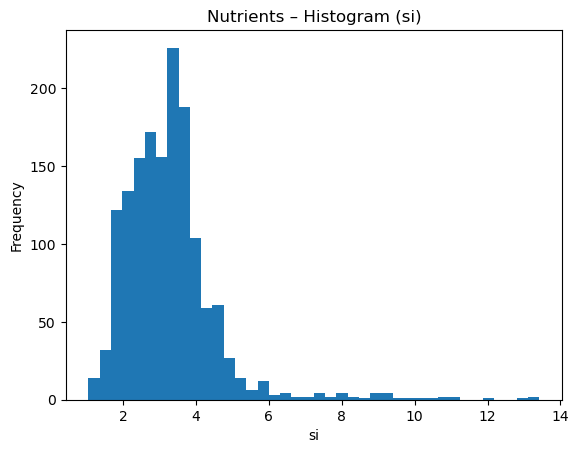

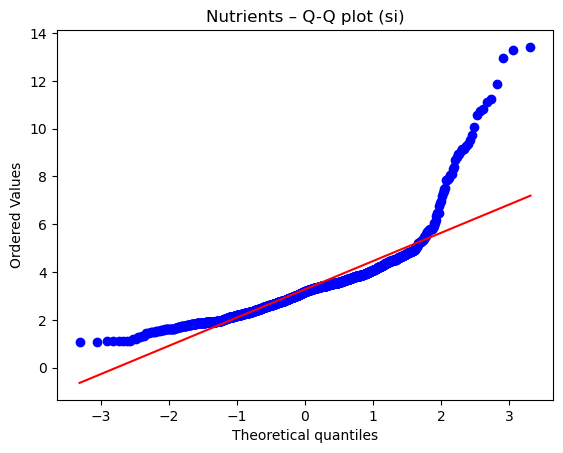

Shapiro-Wilk: W=0.796, p=4.044e-40
D’Agostino-Pearson: K2=964.126, p=4.393e-210
❌ No normal


In [8]:
normality_check(nut, 'no3',  name="Nutrients")
normality_check(nut, 'po4',  name="Nutrients")
normality_check(nut, 'si',   name="Nutrients")


Dataset: Temperature
Variable: thetao
N = 14770


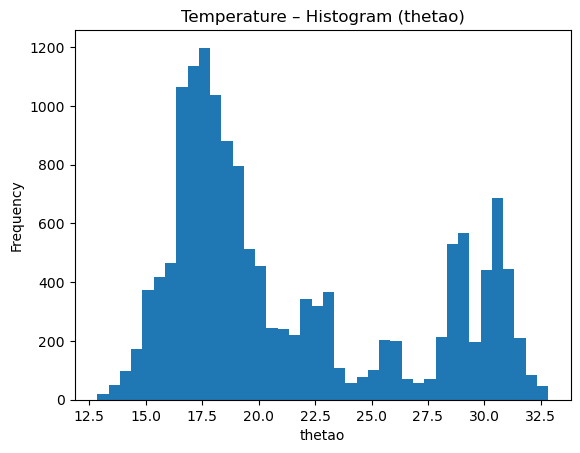

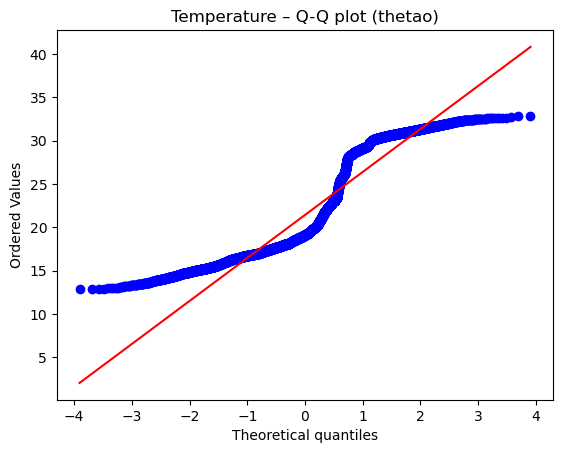

Shapiro-Wilk (subsample): W=0.871, p=1.425e-53
D’Agostino-Pearson: K2=4265.749, p=0.000e+00
❌ No normal


In [9]:
normality_check(temp, 'thetao', name="Temperature")


Dataset: Chlorophyll
Variable: chlor_a
N = 40053


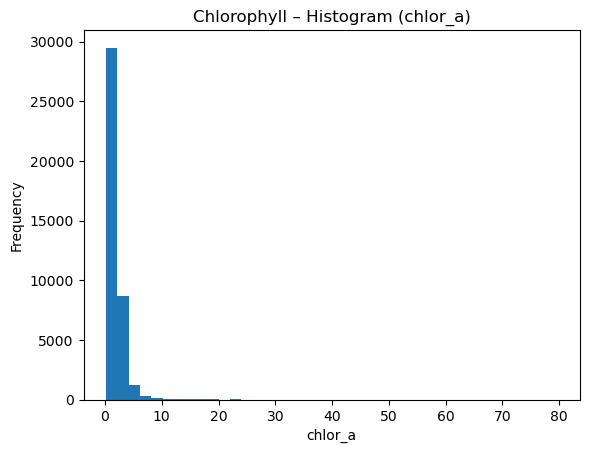

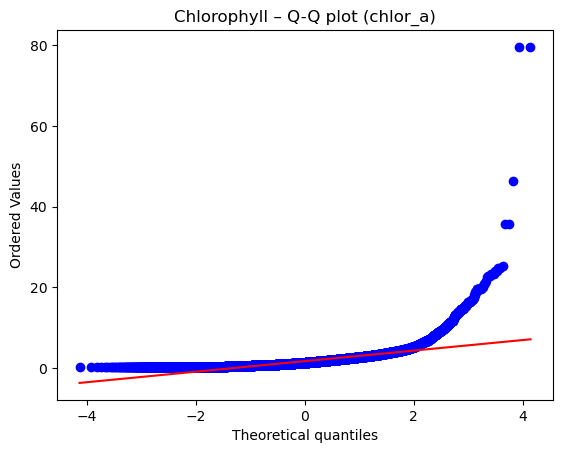

Shapiro-Wilk (subsample): W=0.698, p=1.353e-69
D’Agostino-Pearson: K2=62377.690, p=0.000e+00
❌ No normal


In [10]:
normality_check(clor, 'chlor_a', name="Chlorophyll")

In [11]:
import numpy as np
import pandas as pd

def assign_season(df, time_col='time'):
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])

    df['month'] = df[time_col].dt.month

    df['season'] = np.where(
        df['month'].isin([11, 12, 1, 2, 3, 4]),
        'Upwelling',
        'No-upwelling'
    )

    return df

In [12]:
nut = assign_season(nut, time_col='time')
nut[['time','month','season']].head()

,time,month,season
0,2024-02-01,2,Upwelling
1,2024-02-01,2,Upwelling
2,2024-02-01,2,Upwelling
3,2024-02-01,2,Upwelling
4,2024-02-01,2,Upwelling


In [13]:
temp = assign_season(temp, time_col='time')
temp[['time','month','season']].head()

,time,month,season
0,2024-02-01,2,Upwelling
1,2024-02-01,2,Upwelling
2,2024-02-01,2,Upwelling
3,2024-02-01,2,Upwelling
4,2024-02-01,2,Upwelling


In [14]:
clor = assign_season(clor, time_col='date')
clor[['date','month','season']].head()

,date,month,season
595,2024-06-01,6,No-upwelling
596,2024-06-01,6,No-upwelling
597,2024-06-01,6,No-upwelling
598,2024-06-01,6,No-upwelling
599,2024-06-01,6,No-upwelling


<Figure size 640x480 with 0 Axes>

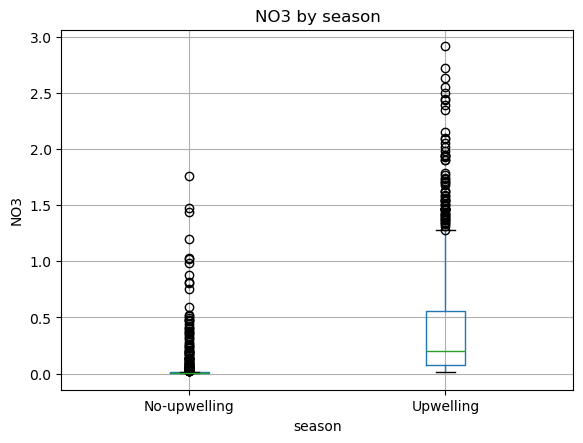

In [15]:
import matplotlib.pyplot as plt

plt.figure()
nut.boxplot(column='no3', by='season')
plt.title("NO3 by season")
plt.suptitle("")  # quita título automático
plt.ylabel("NO3")
plt.show()

<Figure size 640x480 with 0 Axes>

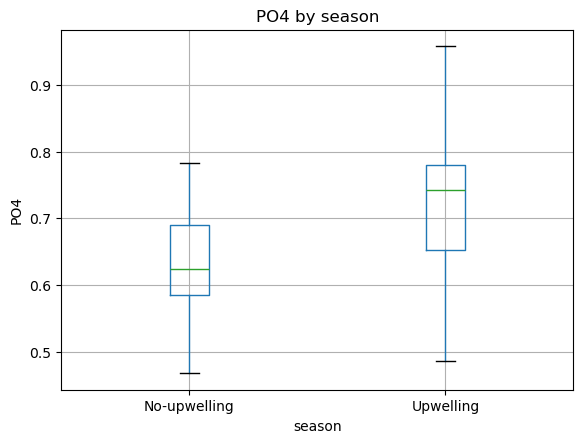

<Figure size 640x480 with 0 Axes>

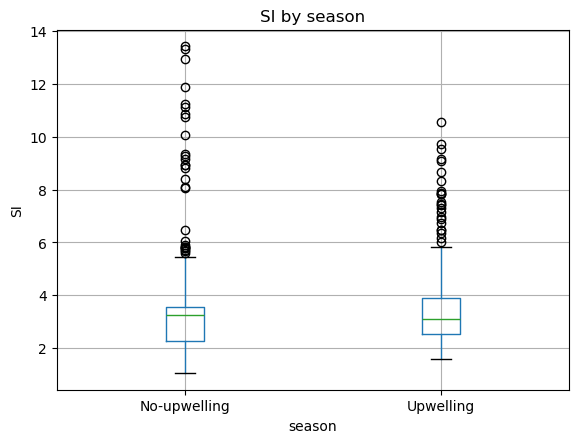

In [16]:
for var in ['po4','si']:
    plt.figure()
    nut.boxplot(column=var, by='season')
    plt.title(f"{var.upper()} by season")
    plt.suptitle("")
    plt.ylabel(var.upper())
    plt.show()

<Figure size 640x480 with 0 Axes>

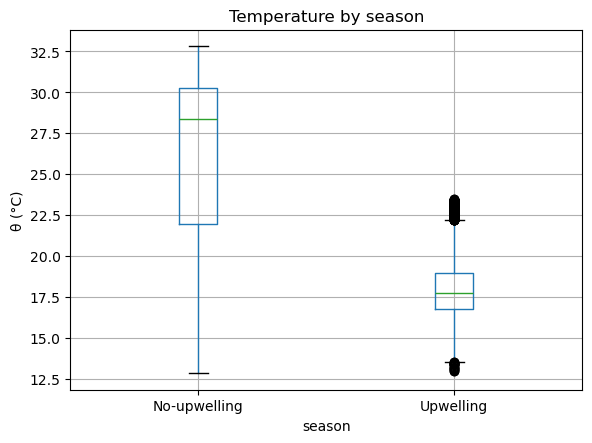

In [17]:
plt.figure()
temp.boxplot(column='thetao', by='season')
plt.title("Temperature by season")
plt.suptitle("")
plt.ylabel("θ (°C)")
plt.show()

<Figure size 640x480 with 0 Axes>

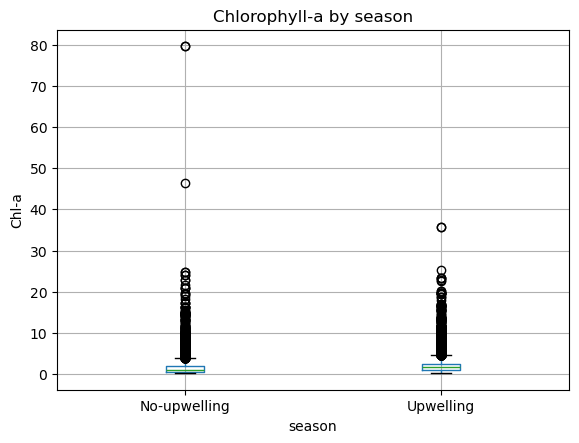

In [18]:
plt.figure()
clor.boxplot(column='chlor_a', by='season')
plt.title("Chlorophyll-a by season")
plt.suptitle("")
plt.ylabel("Chl-a")
plt.show()

In [19]:
#Data were grouped into upwelling (November–April) and non-upwelling (May–October) seasons, and seasonal differences were explored using boxplots

In [20]:
# estandarizar nombre de fecha
clor = clor.rename(columns={"date": "time"})

In [21]:
for df, name in zip([clor, temp], ["clor", "temp"]):
    print(name, ["time" in df.columns, "lat" in df.columns, "lon" in df.columns])

clor [True, True, True]
temp [True, True, True]


In [22]:
keys = ["time", "lat", "lon"]

ct = clor.merge(
    temp[keys + ["thetao"]],
    on=keys,
    how="inner"
)

print("Base clor-temp:", ct.shape)
ct.head()

Base clor-temp: (0, 7)


,time,lat,lon,chlor_a,month,season,thetao


In [23]:
for df in [clor, temp]:
    df["lat"] = df["lat"].round(2)
    df["lon"] = df["lon"].round(2)

In [24]:
clor["time"] = pd.to_datetime(clor["time"]).dt.to_period("M")
temp["time"] = pd.to_datetime(temp["time"]).dt.to_period("M")

In [25]:
clor.columns
temp.columns

Index(['time', 'depth', 'lat', 'lon', 'thetao', 'month', 'season'], dtype='object')

In [26]:
print(clor.columns)

Index(['time', 'lat', 'lon', 'chlor_a', 'month', 'season'], dtype='object')


In [27]:
clor["time"].dtype
temp["time"].dtype

period[M]

In [28]:
for df in [clor, temp]:
    df["lat"] = df["lat"].round(2)
    df["lon"] = df["lon"].round(2)

In [29]:
clor.shape
temp.shape

(39200, 7)

In [30]:
print("clor:", clor.shape)
print("temp:", temp.shape)

clor: (40053, 6)
temp: (39200, 7)


In [31]:
import pandas as pd

temp = pd.read_csv("C:/Users/Usuario/DB/datos_sat/temperatura_base.csv")
temp.shape

(39200, 5)

In [32]:
clor = pd.read_csv("C:/Users/Usuario/DB/datos_sat/clorofila_base.csv")
clor.shape

(40053, 4)

In [33]:
clor.head()
temp.head()

,time,depth,lat,lon,thetao
0,2024-02-01,0.494025,27.916666,-115.333330,17.453094
1,2024-02-01,0.494025,27.916666,-115.250000,17.402447
2,2024-02-01,0.494025,27.916666,-115.166664,17.425081
3,2024-02-01,0.494025,27.916666,-115.083330,17.458990
4,2024-02-01,0.494025,27.916666,-115.000000,17.495415


In [34]:
clor = clor.rename(columns={"date": "time"})

In [35]:
temp["time"] = pd.to_datetime(temp["time"])
clor["time"] = pd.to_datetime(clor["time"])

In [36]:
print(temp["time"].dtype)
print(clor["time"].dtype)

datetime64[ns]
datetime64[ns]


In [37]:
temp[["lat", "lon"]] = temp[["lat", "lon"]].astype(float)
clor[["lat", "lon"]] = clor[["lat", "lon"]].astype(float)

In [38]:
ct = clor.merge(
    temp[["time", "lat", "lon", "thetao"]],
    on=["time", "lat", "lon"],
    how="inner"
)

In [40]:
ct.shape
ct.head()

,time,lat,lon,chlor_a,thetao


In [41]:
print(temp.shape)
print(clor.shape)

(39200, 5)
(40053, 4)


In [42]:
print(temp["time"].dtype)
print(clor["time"].dtype)

datetime64[ns]
datetime64[ns]


In [43]:
print(temp["time"].head(5))
print(clor["time"].head(5))

0   2024-02-01
1   2024-02-01
2   2024-02-01
3   2024-02-01
4   2024-02-01
Name: time, dtype: datetime64[ns]
0   2024-06-01
1   2024-06-01
2   2024-06-01
3   2024-06-01
4   2024-06-01
Name: time, dtype: datetime64[ns]


In [44]:
clor["time"] = pd.to_datetime(clor["time"])
temp["time"] = pd.to_datetime(temp["time"])

In [45]:
start = pd.Timestamp("2024-06-01")
end   = pd.Timestamp("2025-06-30")

In [46]:
clor = clor[(clor["time"] >= start) & (clor["time"] <= end)].copy()
temp = temp[(temp["time"] >= start) & (temp["time"] <= end)].copy()

In [47]:
print("Clor:", clor["time"].min(), "→", clor["time"].max(), clor.shape)
print("Temp:", temp["time"].min(), "→", temp["time"].max(), temp.shape)

Clor: 2024-06-01 00:00:00 → 2025-05-01 00:00:00 (40053, 4)
Temp: 2024-06-01 00:00:00 → 2025-03-01 00:00:00 (28000, 5)


In [48]:
start = pd.Timestamp("2024-06-01")
end   = pd.Timestamp("2025-03-01")

clor = clor[(clor["time"] >= start) & (clor["time"] <= end)].copy()
temp = temp[(temp["time"] >= start) & (temp["time"] <= end)].copy()

In [49]:
print("Clor:", clor["time"].min(), "→", clor["time"].max(), clor.shape)
print("Temp:", temp["time"].min(), "→", temp["time"].max(), temp.shape)

Clor: 2024-06-01 00:00:00 → 2025-03-01 00:00:00 (33379, 4)
Temp: 2024-06-01 00:00:00 → 2025-03-01 00:00:00 (28000, 5)


In [50]:
ct = clor.merge(
    temp[["time", "lat", "lon", "thetao"]],
    on=["time", "lat", "lon"],
    how="inner"
)

ct.shape
ct.head()

,time,lat,lon,chlor_a,thetao


In [51]:
clor_m = (
    clor
    .groupby(clor["time"].dt.to_period("M"))["chlor_a"]
    .mean()
    .reset_index()
)
clor_m["time"] = clor_m["time"].dt.to_timestamp()

In [52]:
temp_m = (
    temp
    .groupby(temp["time"].dt.to_period("M"))["thetao"]
    .mean()
    .reset_index()
)
temp_m["time"] = temp_m["time"].dt.to_timestamp()

In [53]:
ct = clor_m.merge(temp_m, on="time", how="inner")
ct

,time,chlor_a,thetao
0,2024-06-01,1.445630,24.174333
1,2024-07-01,1.045331,27.344086
2,2024-08-01,1.113562,28.670606
3,2024-09-01,1.707824,28.181965
4,2024-10-01,1.612072,26.576500
5,2024-11-01,1.657340,21.087589
6,2024-12-01,1.791809,18.398409
7,2025-01-01,1.471255,16.623575
8,2025-02-01,2.068170,16.421140
9,2025-03-01,2.578992,17.049205


In [54]:
from scipy.stats import spearmanr

rho, p = spearmanr(ct["chlor_a"], ct["thetao"])

print(f"Spearman rho = {rho:.2f}")
print(f"p-value = {p:.4f}")

Spearman rho = -0.60
p-value = 0.0667


In [56]:
def season_from_month(month):
    if month in [11,12,1,2,3,4]:
        return "Upwelling"
    else:
        return "No-upwelling"

clor_m["season"] = clor_m["time"].dt.month.apply(season_from_month)
temp_m["season"] = temp_m["time"].dt.month.apply(season_from_month)

In [57]:
ct = clor_m.merge(
    temp_m,
    on="time",
    how="inner"
)

ct

,time,chlor_a,season_x,thetao,season_y
0,2024-06-01,1.445630,No-upwelling,24.174333,No-upwelling
1,2024-07-01,1.045331,No-upwelling,27.344086,No-upwelling
2,2024-08-01,1.113562,No-upwelling,28.670606,No-upwelling
3,2024-09-01,1.707824,No-upwelling,28.181965,No-upwelling
4,2024-10-01,1.612072,No-upwelling,26.576500,No-upwelling
5,2024-11-01,1.657340,Upwelling,21.087589,Upwelling
6,2024-12-01,1.791809,Upwelling,18.398409,Upwelling
7,2025-01-01,1.471255,Upwelling,16.623575,Upwelling
8,2025-02-01,2.068170,Upwelling,16.421140,Upwelling
9,2025-03-01,2.578992,Upwelling,17.049205,Upwelling


In [58]:
from scipy.stats import spearmanr

rho, p = spearmanr(ct["chlor_a"], ct["thetao"])

print(f"Spearman rho = {rho:.2f}")
print(f"p-value = {p:.4f}")


Spearman rho = -0.60
p-value = 0.0667


In [59]:
for season in ct["season_x"].unique():
    sub = ct[ct["season_x"] == season]
    rho, p = spearmanr(sub["chlor_a"], sub["thetao"])
    print(f"{season}: rho = {rho:.2f}, p = {p:.4f}")

No-upwelling: rho = -0.10, p = 0.8729
Upwelling: rho = -0.20, p = 0.7471


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

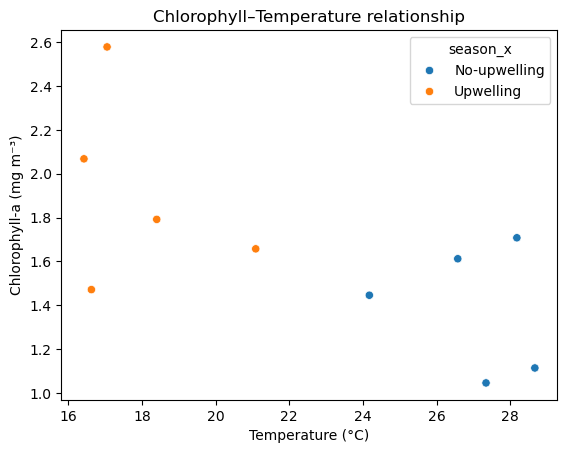

In [62]:
plt.figure()
sns.scatterplot(
    data=ct,
    x="thetao",
    y="chlor_a",
    hue="season_x"
)
plt.xlabel("Temperature (°C)")
plt.ylabel("Chlorophyll-a (mg m⁻³)")
plt.title("Chlorophyll–Temperature relationship")
plt.show()

In [66]:
!pip install pygam


   ---------------------------------------- 0/3 [python-utils]
   ---------------------------------------- 0/3 [python-utils]
   ---------------------------------------- 0/3 [python-utils]
   ------------- -------------------------- 1/3 [progressbar2]
   ------------- -------------------------- 1/3 [progressbar2]
   ------------- -------------------------- 1/3 [progressbar2]
   ------------- -------------------------- 1/3 [progressbar2]
   ------------- -------------------------- 1/3 [progressbar2]
   ------------- -------------------------- 1/3 [progressbar2]
   -------------------------- ------------- 2/3 [pygam]
   -------------------------- ------------- 2/3 [pygam]
   -------------------------- ------------- 2/3 [pygam]
   -------------------------- ------------- 2/3 [pygam]
   -------------------------- ------------- 2/3 [pygam]
   -------------------------- ------------- 2/3 [pygam]
   -------------------------- ------------- 2/3 [pygam]
   -------------------------- ----------

In [67]:
from pygam import LinearGAM, s, f

In [72]:
# efecto parcial
pdep = gam_temp.partial_dependence(term=0, X=XX)

# efecto parcial + intervalos de confianza
pdep_ci = gam_temp.partial_dependence(term=0, X=XX, width=0.95)

# separar correctamente
pdep_mean = pdep_ci[0]
ci = pdep_ci[1]

lower = ci[:, 0]
upper = ci[:, 1]

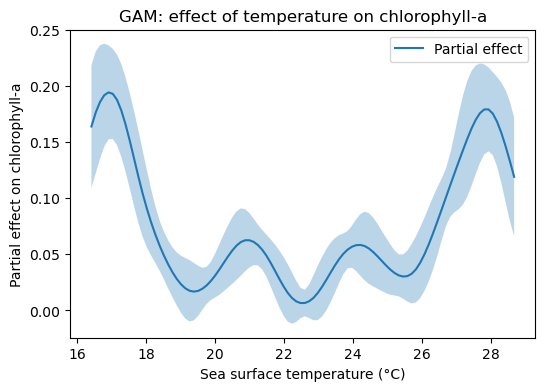

In [73]:
plt.figure(figsize=(6,4))

plt.plot(XX[:, 0], pdep_mean, label="Partial effect")
plt.fill_between(
    XX[:, 0],
    lower,
    upper,
    alpha=0.3
)

plt.xlabel("Sea surface temperature (°C)")
plt.ylabel("Partial effect on chlorophyll-a")
plt.title("GAM: effect of temperature on chlorophyll-a")
plt.legend()
plt.show()

In [78]:
nut.columns

Index(['time', 'depth', 'lat', 'lon', 'no3', 'po4', 'si', 'month', 'season',
       'lat_bin'],
      dtype='object')

In [79]:
nut_long = nut.melt(
    id_vars=["lat", "season"],
    value_vars=["no3", "po4", "si"],
    var_name="nutrient",
    value_name="value"
)

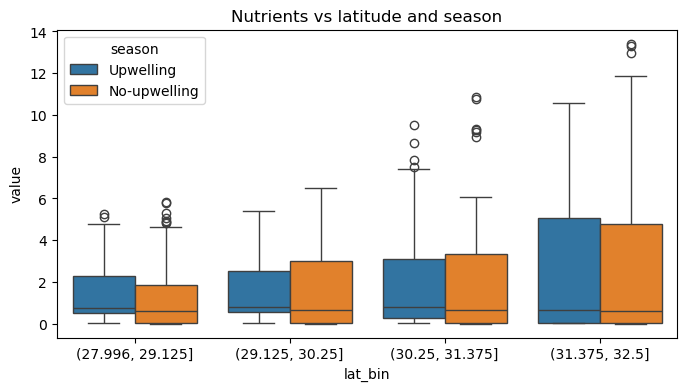

In [80]:
nut_long["lat_bin"] = pd.cut(nut_long["lat"], bins=4)

plt.figure(figsize=(8,4))
sns.boxplot(
    data=nut_long,
    x="lat_bin",
    y="value",
    hue="season"
)
plt.title("Nutrients vs latitude and season")
plt.show()

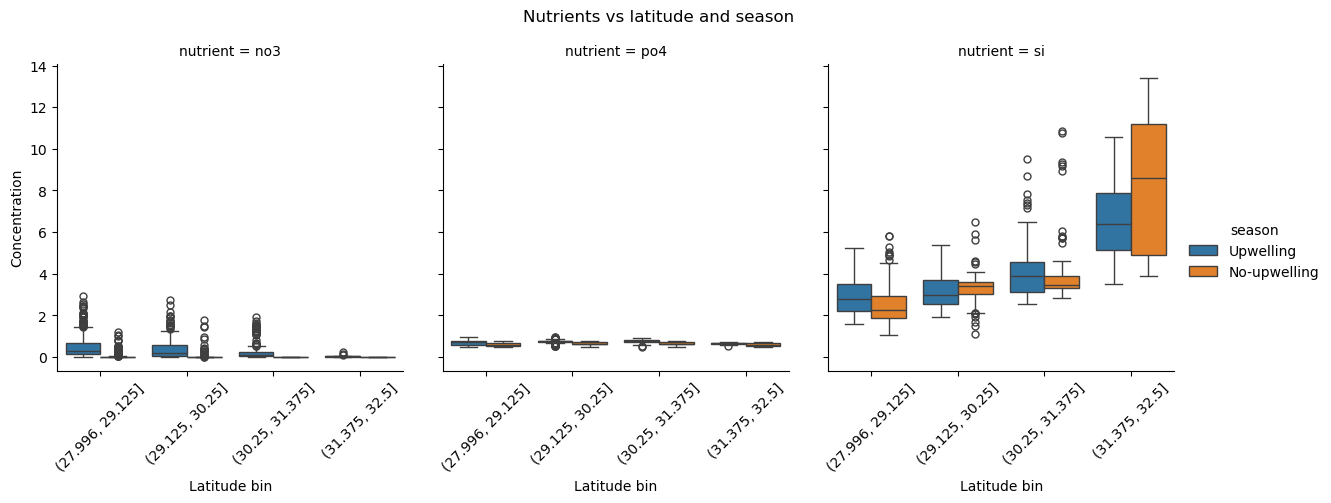

In [81]:
nut_long["lat_bin"] = pd.cut(nut_long["lat"], bins=4)

g = sns.catplot(
    data=nut_long,
    x="lat_bin",
    y="value",
    hue="season",
    col="nutrient",
    kind="box",
    col_wrap=3,
    height=4,
    aspect=1
)

g.set_xticklabels(rotation=45)
g.set_axis_labels("Latitude bin", "Concentration")
g.fig.suptitle("Nutrients vs latitude and season", y=1.05)

plt.show()

In [82]:
# Clorofila
clor["lat_bin"] = pd.cut(clor["lat"], bins=4)

# Temperatura
temp["lat_bin"] = pd.cut(temp["lat"], bins=4)

In [84]:
clor.columns

Index(['time', 'lat', 'lon', 'chlor_a', 'lat_bin'], dtype='object')

In [85]:
clor["month"] = clor["time"].dt.month

clor["season"] = np.where(
    clor["month"].isin([11,12,1,2,3,4]),
    "Upwelling",
    "No-upwelling"
)

In [86]:
clor[["lat_bin", "chlor_a", "season"]].head()

,lat_bin,chlor_a,season
0,"(31.083, 31.937]",3.638275,No-upwelling
1,"(31.083, 31.937]",4.231940,No-upwelling
2,"(31.083, 31.937]",4.120379,No-upwelling
3,"(31.083, 31.937]",3.585763,No-upwelling
4,"(31.083, 31.937]",3.597894,No-upwelling


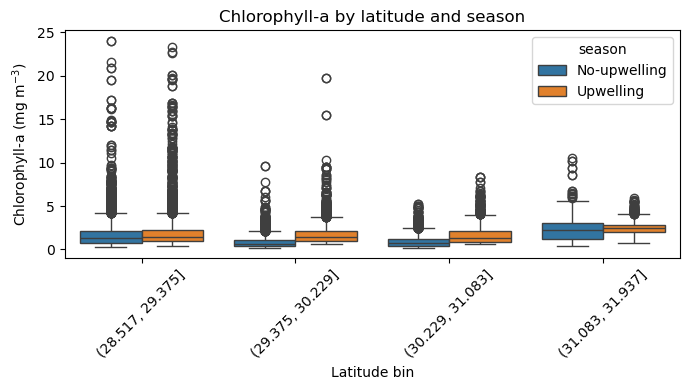

In [87]:
plt.figure(figsize=(7,4))
sns.boxplot(
    data=clor,
    x="lat_bin",
    y="chlor_a",
    hue="season"
)

plt.xticks(rotation=45)
plt.xlabel("Latitude bin")
plt.ylabel("Chlorophyll-a (mg m$^{-3}$)")
plt.title("Chlorophyll-a by latitude and season")
plt.tight_layout()
plt.show()

In [89]:
temp.columns

Index(['time', 'depth', 'lat', 'lon', 'thetao', 'lat_bin'], dtype='object')

In [90]:
import numpy as np
import pandas as pd

# asegurarnos que time es datetime
temp["time"] = pd.to_datetime(temp["time"])

# extraer mes
temp["month"] = temp["time"].dt.month

# crear season
temp["season"] = np.where(
    temp["month"].isin([11, 12, 1, 2, 3, 4]),
    "Upwelling",
    "No-upwelling"
)

temp[["time", "month", "season"]].head()

,time,month,season
11200,2024-06-01,6,No-upwelling
11201,2024-06-01,6,No-upwelling
11202,2024-06-01,6,No-upwelling
11203,2024-06-01,6,No-upwelling
11204,2024-06-01,6,No-upwelling


In [91]:
temp["lat_bin"] = pd.cut(temp["lat"], bins=4)

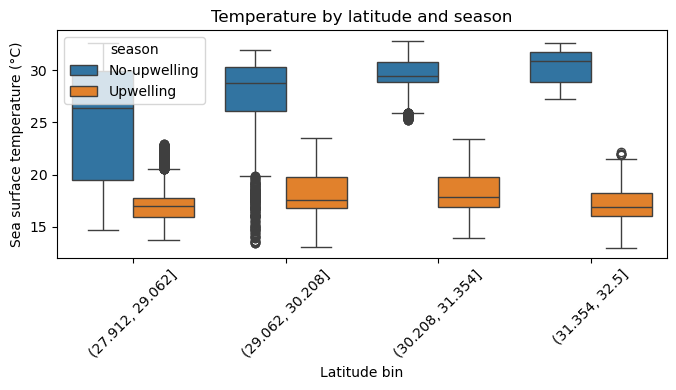

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.boxplot(
    data=temp,
    x="lat_bin",
    y="thetao",
    hue="season"
)

plt.xticks(rotation=45)
plt.xlabel("Latitude bin")
plt.ylabel("Sea surface temperature (°C)")
plt.title("Temperature by latitude and season")
plt.tight_layout()
plt.show()